In [41]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import MinMaxScaler

import plotly.express as px

%matplotlib inline

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [12]:
df = pd.read_csv("KickStarterProjects.csv")

<IPython.core.display.Javascript object>

In [13]:
df.head()

,ID,name,subcategory,category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,09-10-2015,1000.0,11-08-2015 12:12,0.0,failed,0,GB,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,01-11-2017,30000.0,02-09-2017 04:43,2421.0,failed,15,US,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,26-02-2013,45000.0,12-01-2013 00:20,220.0,failed,3,US,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,16-04-2012,5000.0,17-03-2012 03:24,1.0,failed,1,US,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,29-08-2015,19500.0,04-07-2015 08:35,1283.0,canceled,14,US,1283.0,19500.00


<IPython.core.display.Javascript object>

In [14]:
df.shape

(378661, 14)

<IPython.core.display.Javascript object>

In [15]:
df.drop(["currency", "goal"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [16]:
df.describe(percentiles=[0.25, 0.5, 0.75])

,ID,pledged,backers,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,378661.000000,3.786610e+05,3.786610e+05
mean,1.074731e+09,9.682979e+03,105.617476,9.058924e+03,4.545440e+04
std,6.190862e+08,9.563601e+04,907.185035,9.097334e+04,1.152950e+06
min,5.971000e+03,0.000000e+00,0.000000,0.000000e+00,1.000000e-02
25%,5.382635e+08,3.000000e+01,2.000000,3.100000e+01,2.000000e+03
50%,1.075276e+09,6.200000e+02,12.000000,6.243300e+02,5.500000e+03
75%,1.610149e+09,4.076000e+03,56.000000,4.050000e+03,1.550000e+04
max,2.147476e+09,2.033899e+07,219382.000000,2.033899e+07,1.663614e+08


<IPython.core.display.Javascript object>

In [17]:
df.drop("ID", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pledged,378661.0,9682.979339,9.563601e+04,0.00,30.0,620.00,4076.0,2.033899e+07
backers,378661.0,105.617476,9.071850e+02,0.00,2.0,12.00,56.0,2.193820e+05
usd_pledged_real,378661.0,9058.924074,9.097334e+04,0.00,31.0,624.33,4050.0,2.033899e+07
usd_goal_real,378661.0,45454.401465,1.152950e+06,0.01,2000.0,5500.00,15500.0,1.663614e+08


<IPython.core.display.Javascript object>

In [7]:
df.shape

(378661, 13)

<IPython.core.display.Javascript object>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              378657 non-null  object 
 1   subcategory       378661 non-null  object 
 2   category          378661 non-null  object 
 3   currency          378661 non-null  object 
 4   deadline          378661 non-null  object 
 5   goal              378661 non-null  float64
 6   launched          378661 non-null  object 
 7   pledged           378661 non-null  float64
 8   state             378661 non-null  object 
 9   backers           378661 non-null  int64  
 10  country           378661 non-null  object 
 11  usd_pledged_real  378661 non-null  float64
 12  usd_goal_real     378661 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 37.6+ MB


<IPython.core.display.Javascript object>

In [19]:
df.isnull().sum()

name                4
subcategory         0
category            0
deadline            0
launched            0
pledged             0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

<IPython.core.display.Javascript object>

In [21]:
df.duplicated(subset=["name"])

0         False
1         False
2         False
3         False
4         False
          ...  
378656    False
378657    False
378658    False
378659    False
378660    False
Length: 378661, dtype: bool

<IPython.core.display.Javascript object>

In [25]:
df.dropna(inplace=True)

<IPython.core.display.Javascript object>

In [26]:
df.shape

(378657, 11)

<IPython.core.display.Javascript object>

In [27]:
df.sample(5)

,name,subcategory,category,deadline,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
207624,Swallowtail Whiskey Barrel Project,Drinks,Food,16-12-2016,01-11-2016 18:05,10067.00,successful,41,US,10067.00,10000.0
246161,The Pizza Cart is Moving Indoors!,Restaurants,Food,22-08-2014,28-07-2014 20:10,16779.00,successful,148,US,16779.00,15000.0
275722,Mage Wars The Ancient Prophecy (Canceled),Tabletop Games,Games,27-08-2011,28-06-2011 16:35,570.99,canceled,9,US,570.99,22000.0
73475,Patrick's Homemade Southern Style BBQ Sauces,Food,Food,28-08-2012,29-07-2012 02:10,2067.00,successful,58,US,2067.00,1500.0
251554,BMAC or bust!,Art,Art,20-01-2013,21-12-2012 00:11,9140.13,successful,166,US,9140.13,5000.0


<IPython.core.display.Javascript object>

In [30]:
df["state"].unique()

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended'], dtype=object)

<IPython.core.display.Javascript object>

In [31]:
df["state"].value_counts()

failed        197716
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1845
Name: state, dtype: int64

<IPython.core.display.Javascript object>

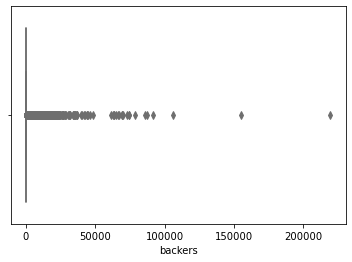

<IPython.core.display.Javascript object>

In [35]:
sns.boxplot(data=df, x="backers", color="violet")
plt.show()

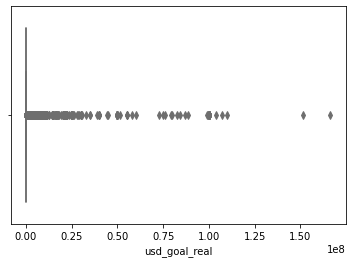

<IPython.core.display.Javascript object>

In [40]:
sns.boxplot(data=df, x="usd_goal_real", color="violet")
plt.show()

In [38]:
df.head()

,name,subcategory,category,deadline,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
0,The Songs of Adelaide & Abullah,Poetry,Publishing,09-10-2015,11-08-2015 12:12,0.0,failed,0,GB,0.0,1533.95
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,01-11-2017,02-09-2017 04:43,2421.0,failed,15,US,2421.0,30000.00
2,Where is Hank?,Narrative Film,Film & Video,26-02-2013,12-01-2013 00:20,220.0,failed,3,US,220.0,45000.00
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,16-04-2012,17-03-2012 03:24,1.0,failed,1,US,1.0,5000.00
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,29-08-2015,04-07-2015 08:35,1283.0,canceled,14,US,1283.0,19500.00


<IPython.core.display.Javascript object>

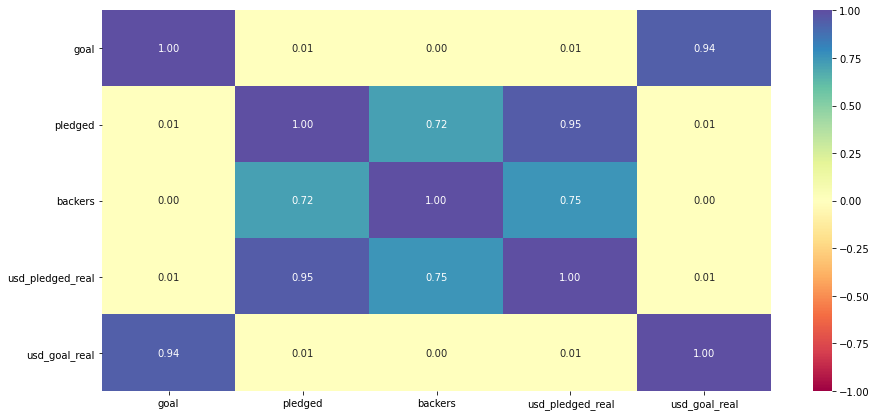

<IPython.core.display.Javascript object>

In [9]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pledged,378657.0,9683.080264,9.563651e+04,0.00,30.0,620.00,4076.0,2.033899e+07
backers,378657.0,105.618544,9.071898e+02,0.00,2.0,12.00,56.0,2.193820e+05
usd_pledged_real,378657.0,9059.018090,9.097382e+04,0.00,31.0,624.38,4050.0,2.033899e+07
usd_goal_real,378657.0,45454.245896,1.152956e+06,0.01,2000.0,5500.00,15500.0,1.663614e+08


<IPython.core.display.Javascript object>

In [49]:
scaler = MinMaxScaler()
df1 = df.copy()
# df1["usd_goal_real"] = scaler.fit_transform(df1["usd_goal_real"])

<IPython.core.display.Javascript object>

In [52]:
df_log = np.log(df["usd_goal_real"])

<IPython.core.display.Javascript object>

In [ ]:
sns.histplot(data=df_log, x="usd_goal_real")

In [54]:
df_log.head()

0     7.335601
1    10.308953
2    10.714418
3     8.517193
4     9.878170
Name: usd_goal_real, dtype: float64

<IPython.core.display.Javascript object>

In [57]:
df["category"].value_counts()

Film & Video    63584
Music           51918
Publishing      39874
Games           35230
Technology      32569
Design          30069
Art             28152
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: category, dtype: int64

<IPython.core.display.Javascript object>

In [58]:
df["launched"].value_counts()

20-06-2017 16:00    15
13-11-2013 00:02     8
01-11-2016 16:00     8
01-01-1970 01:00     7
11-07-2014 21:15     7
                    ..
18-02-2015 21:33     1
18-02-2014 18:07     1
10-07-2014 04:58     1
22-04-2017 20:40     1
06-12-2017 23:36     1
Name: launched, Length: 347031, dtype: int64

<IPython.core.display.Javascript object>

In [60]:
df.pledged.quantile(0.6)

1411.6800000000046

<IPython.core.display.Javascript object>

In [ ]:
sns.pairplot(data=df, hue='category', diag_kind='kde')
plt.show()